In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-motor-temps/measures_v2.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
%matplotlib inline
import seaborn

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/electric-motor-temps/measures_v2.csv")
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
df.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [5]:
df = df[[
    'profile_id', 'u_d', 'u_q', 'i_d', 'i_q', 'motor_speed', 'torque',
    'stator_winding', 'stator_tooth', 'stator_yoke', 'ambient', 'coolant', 'pm'
]]

In [6]:
df.head().style.background_gradient(cmap='cool')

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm
0,17,-0.350055,-0.450682,0.004419,0.000328,0.002866,0.187101,19.086670,18.293219,18.316547,19.850691,18.805172,24.554214
1,17,-0.305803,-0.325737,0.000606,-0.000785,0.000257,0.245417,19.092390,18.294807,18.314955,19.850672,18.818571,24.538078
2,17,-0.372503,-0.440864,0.001290,0.000386,0.002355,0.176615,19.089380,18.294094,18.326307,19.850657,18.828770,24.544693
3,17,-0.316199,-0.327026,0.000026,0.002046,0.006105,0.238303,19.083031,18.292542,18.330833,19.850647,18.835567,24.554018
4,17,-0.332272,-0.471150,-0.064317,0.037184,0.003133,0.208197,19.082525,18.291428,18.326662,19.850639,18.857033,24.565397


In [7]:
print(f'\033[95m')
print(df.shape)
print(df.size)


(1330816, 13)
17300608


In [8]:
df.isnull().sum()

profile_id        0
u_d               0
u_q               0
i_d               0
i_q               0
motor_speed       0
torque            0
stator_winding    0
stator_tooth      0
stator_yoke       0
ambient           0
coolant           0
pm                0
dtype: int64

In [9]:
df['profile_id'].nunique()

69

In [10]:
df['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71])

In [11]:
df.describe().round(3)

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,40.793,-25.134,54.279,-68.717,37.413,2202.081,31.106,66.343,56.879,48.188,24.565,36.230,58.507
std,25.045,63.092,44.173,64.933,92.182,1859.663,77.136,28.672,22.952,19.991,1.930,21.786,19.001
min,2.000,-131.530,-25.291,-278.004,-293.427,-275.549,-246.467,18.586,18.134,18.077,8.783,10.624,20.857
25%,17.000,-78.691,12.070,-115.406,1.096,317.111,-0.137,42.788,38.416,31.990,23.185,18.698,43.152
50%,43.000,-7.430,48.938,-51.094,15.774,1999.977,10.860,65.110,56.036,45.626,24.797,26.900,60.266
75%,65.000,1.470,90.034,-2.980,100.612,3760.639,91.597,88.141,75.587,61.461,26.217,49.857,72.008
max,81.000,131.470,133.037,0.052,301.708,6000.015,261.006,141.363,111.946,101.148,30.714,101.599,113.607


In [12]:
grouped_df_id = df.groupby(['profile_id'])

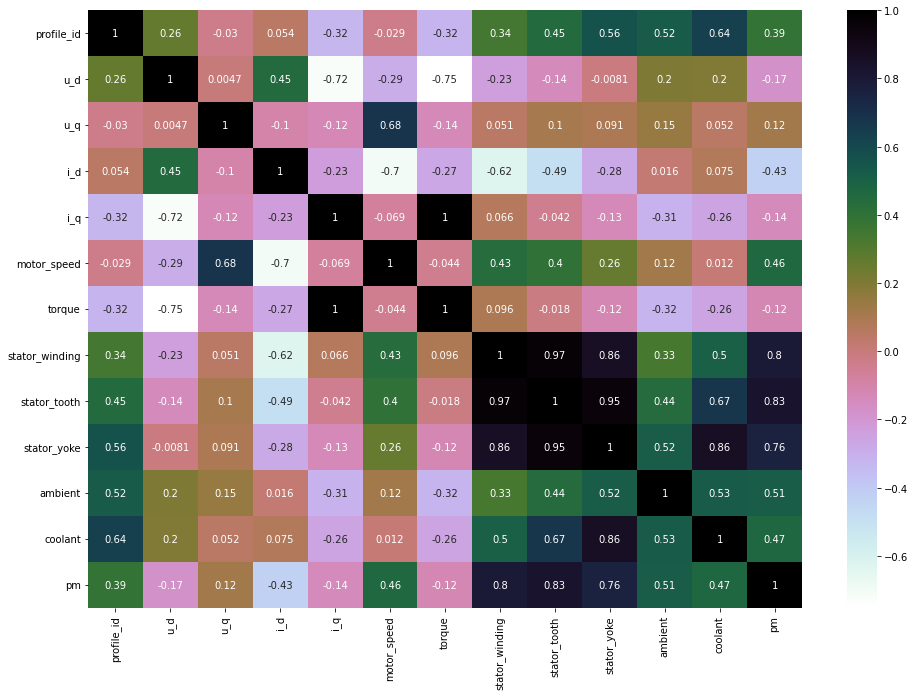

In [13]:
plt.figure(figsize=(16,11))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r');

In [14]:
df['pm_range'] = pd.cut(x=df['pm'],bins=[1, 30, 60, 90, 120],labels=['Low', 'Average', 'High',"V_High"])
df.head(2)

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm,pm_range
0,17,-0.350055,-0.450682,0.004419,0.000328,0.002866,0.187101,19.08667,18.293219,18.316547,19.850691,18.805172,24.554214,Low
1,17,-0.305803,-0.325737,0.000606,-0.000785,0.000257,0.245417,19.09239,18.294807,18.314955,19.850672,18.818571,24.538078,Low


In [15]:
df['pm_range'].value_counts()

High       611022
Average    563814
Low         94994
V_High      60986
Name: pm_range, dtype: int64

In [16]:
print(f'\033[92m')
print("Minimum ambient temp:",df['ambient'].round(2).min())
print(f'\033[94m')
print("Maximum ambient temp:",df['ambient'].round(2).max())


Minimum ambient temp: 8.78

Maximum ambient temp: 30.71


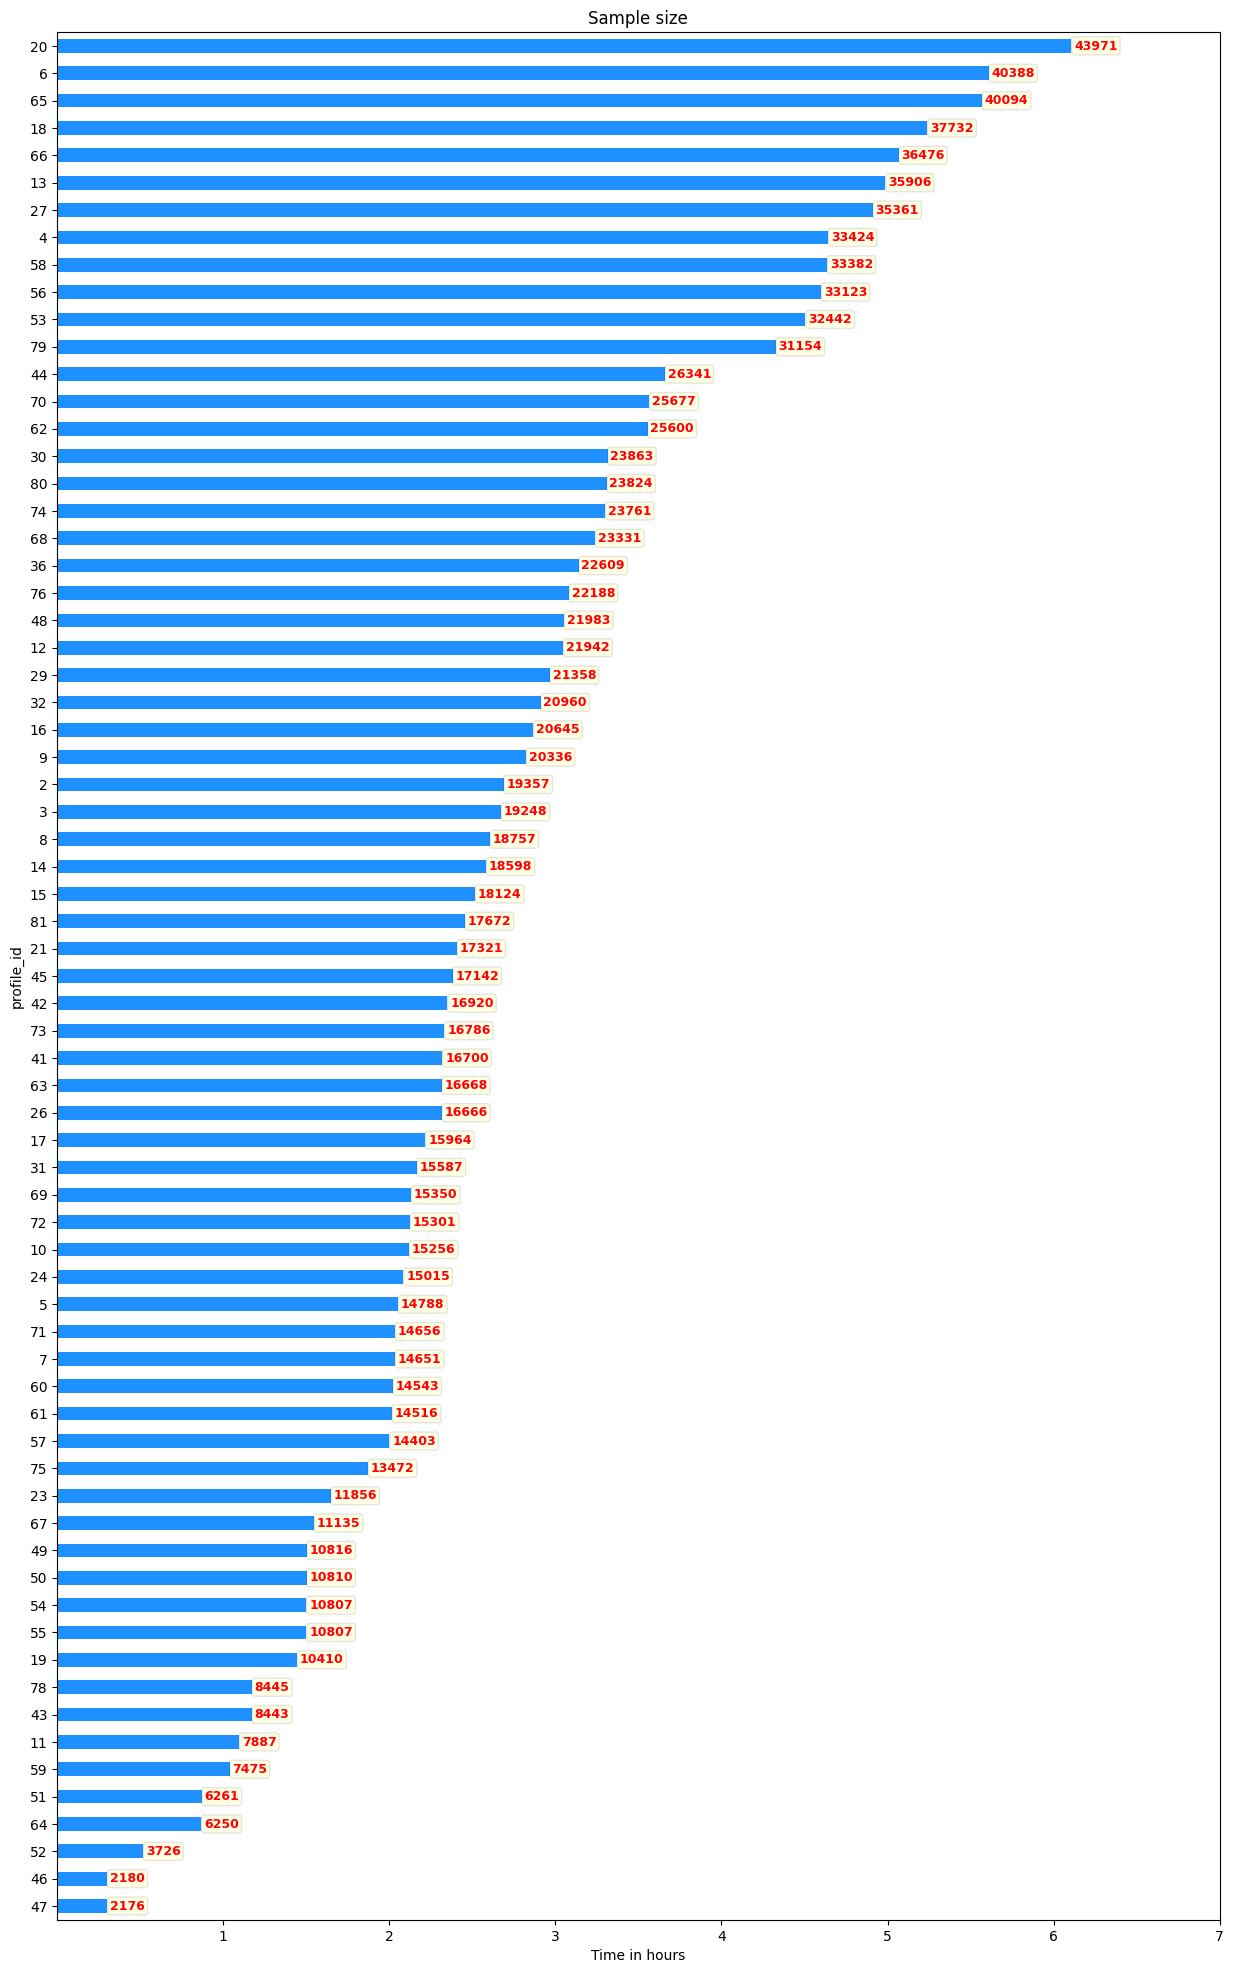

In [18]:
# import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


p = fig = plt.figure(figsize=(15, 25),dpi=100)
p_counts = df.groupby('profile_id')['pm'].agg('count').sort_values()
p = p_counts.plot.barh(title='Sample size',color = "dodgerblue")
_ = p.set_xticks(2*3600*np.arange(1, 8)) # 2Hz sample rate
_ = p.set_xticklabels(list(range(1, 8)))
_ = p.set_xlabel('Time in hours')


for container in p.containers:
    p.bar_label(container,label_type = 'edge',padding = 2,size = 9,color = "Red",weight = 'bold',rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "yellow", "alpha": .1})
    

#Patches
for a in p.patches:
    value = f'{a.get_width():.0f}'
    x = a.get_x() + a.get_width() + .06
    y = a.get_y() + a.get_height() / 1.8



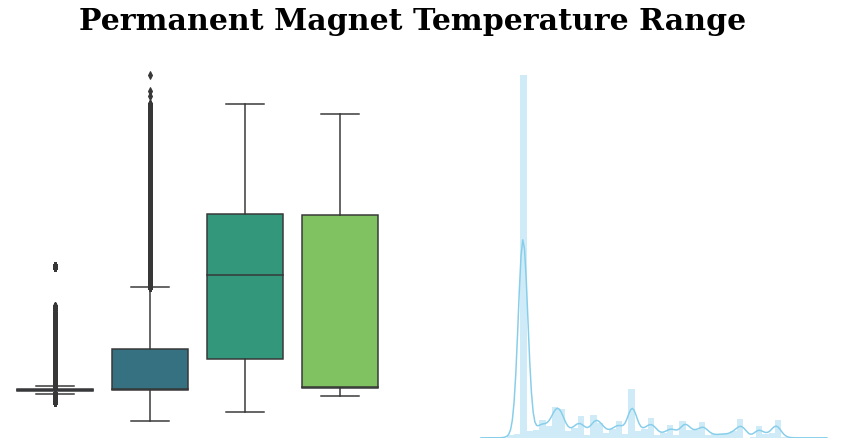

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

background_color = "#ffffff"
fig = plt.figure(figsize=(15, 7), facecolor=background_color)
fig.suptitle('Permanent Magnet Temperature Range', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["pm_range"], y=df["coolant"], palette="viridis") 
plt.axis('off')

ax2 = fig.add_subplot(122)
x = df["coolant"]
ax2 = sns.distplot(x, color="skyblue")  
plt.axis('off')
plt.show()


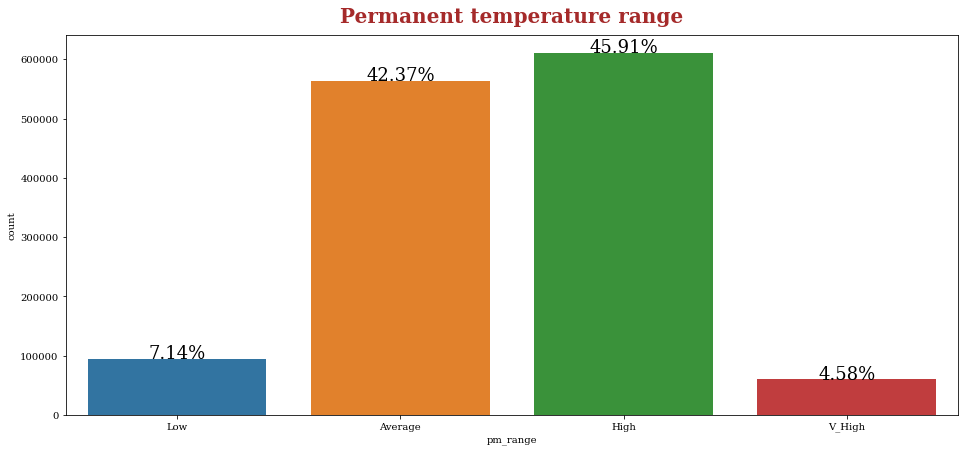

In [20]:
#viz parameters
plt.rcParams['figure.figsize'] = (16,7)

s = sns.countplot(x = 'pm_range',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=18) 
plt.title("Permanent temperature range", fontsize=20, fontweight='bold',color='Brown',pad=12);

In [21]:
print(f'\033[92m')
print("Minimum ambient temp:",df['pm'].round(2).min())
print(f'\033[94m')
print("Maximum ambient temp:",df['pm'].round(2).max())


Minimum ambient temp: 20.86

Maximum ambient temp: 113.61


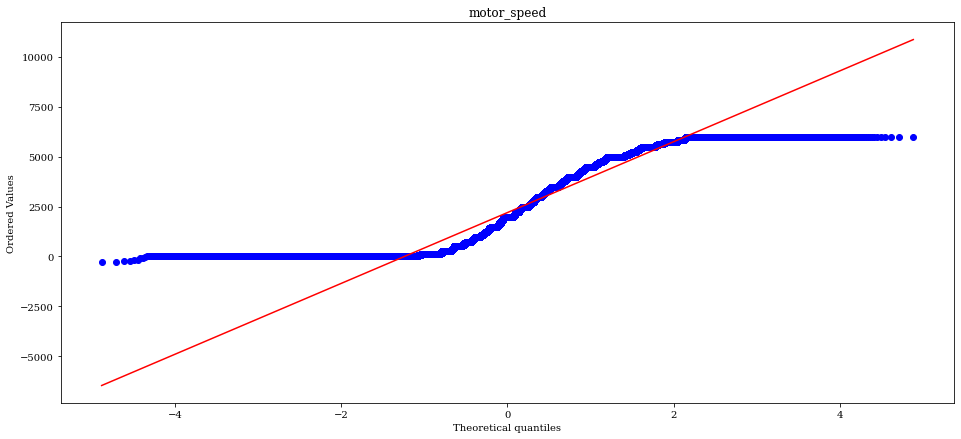

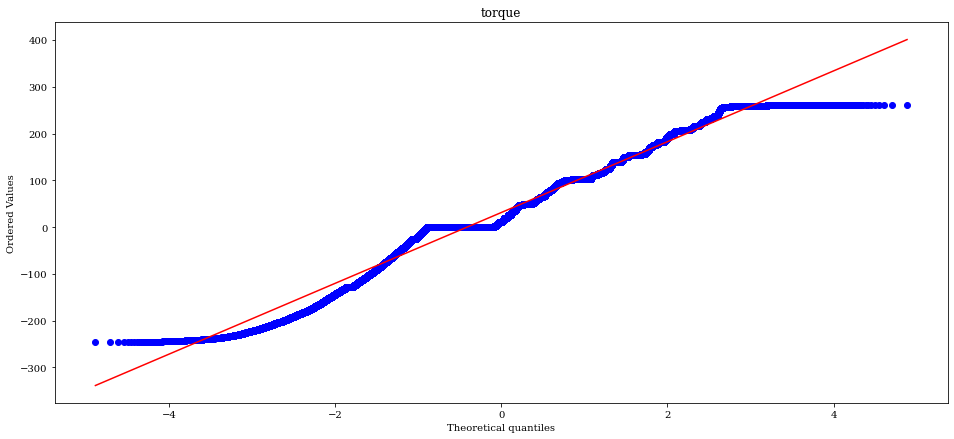

In [25]:
from scipy import stats
for feature in df[["motor_speed" , "torque"]]:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

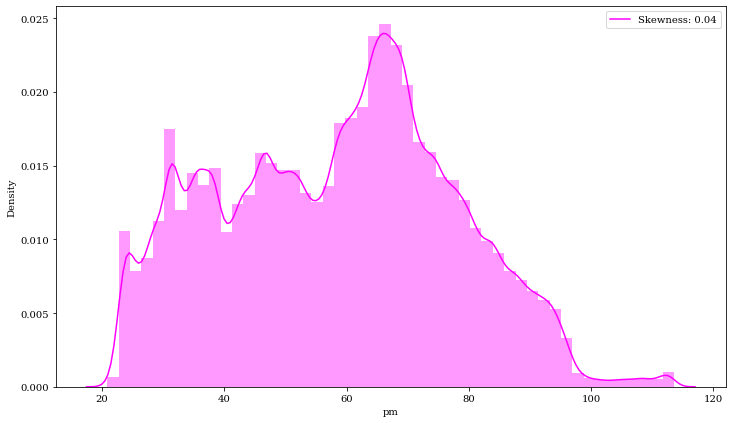

In [26]:
# Plot the distplot of target

plt.figure(figsize=(12,7))
bar = sns.distplot(df["pm"],color='magenta')
bar.legend(["Skewness: {:.2f}".format(df['pm'].skew())])
plt.show()

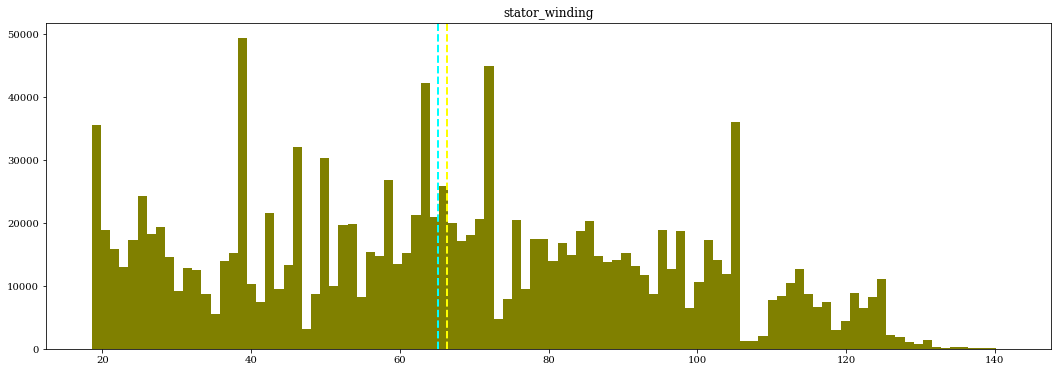

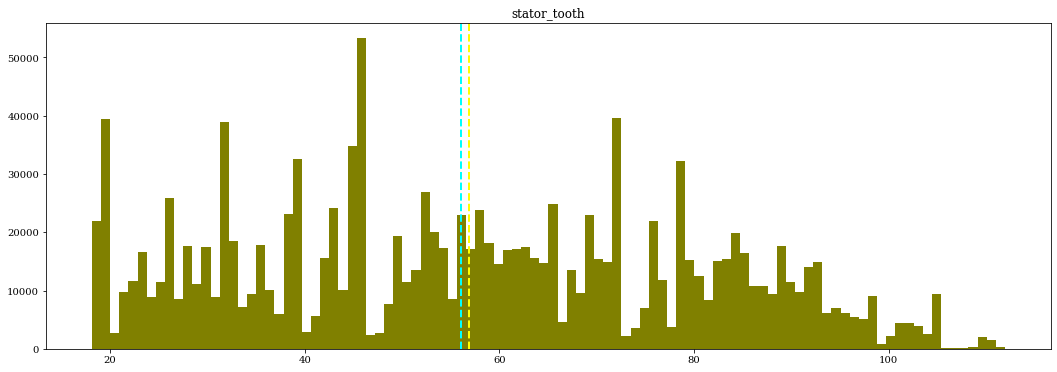

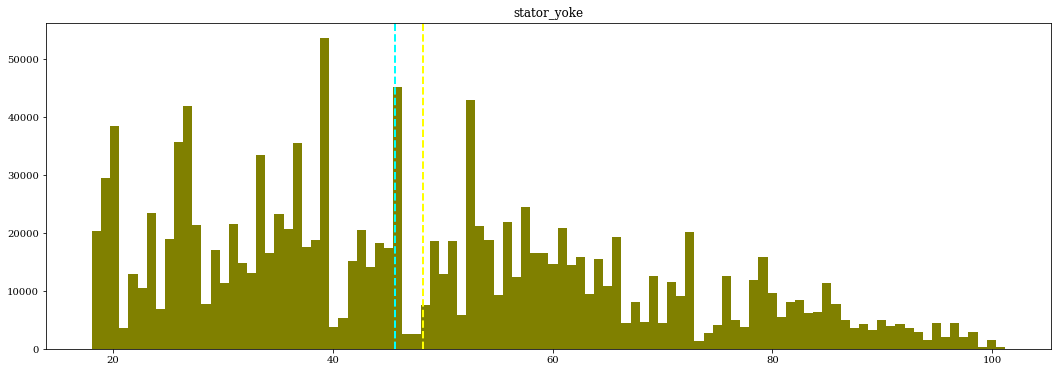

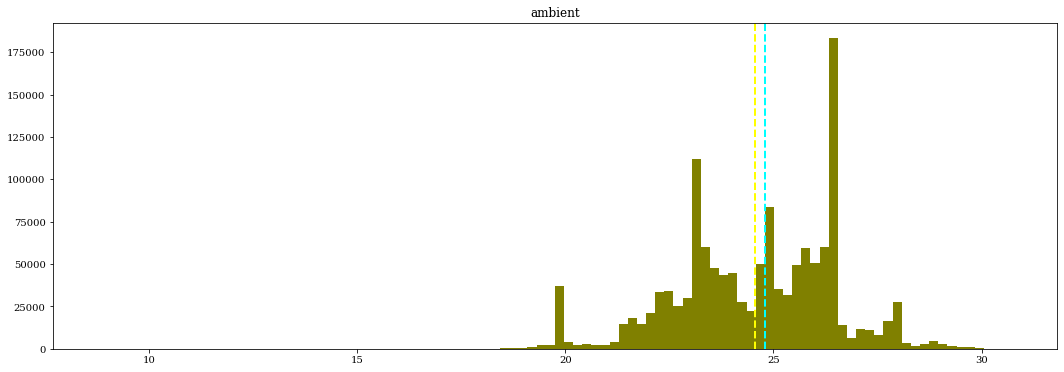

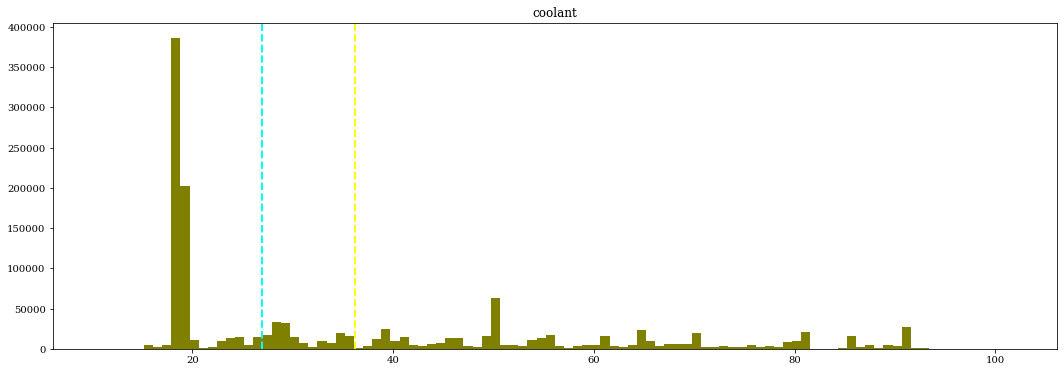

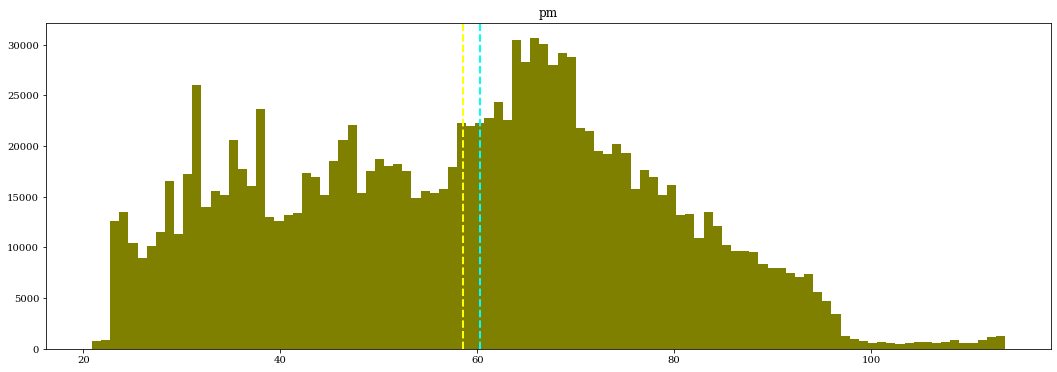

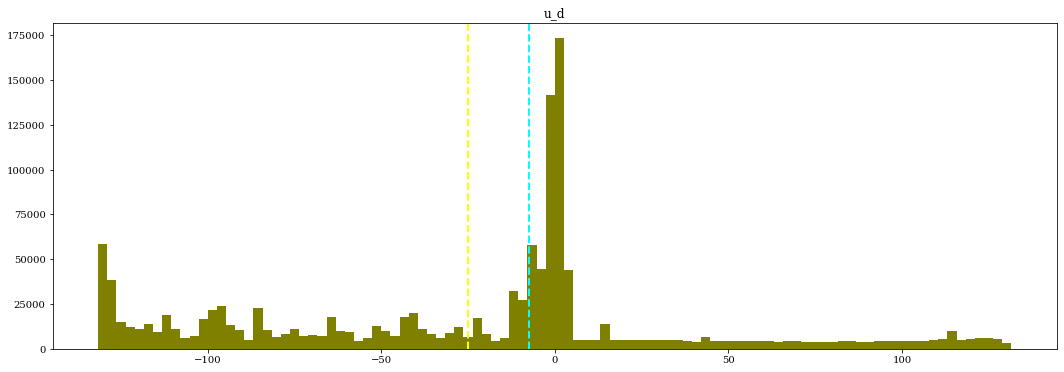

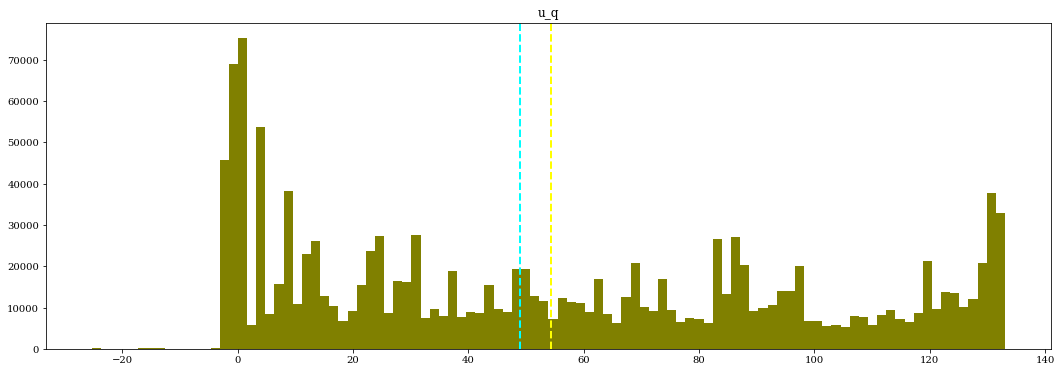

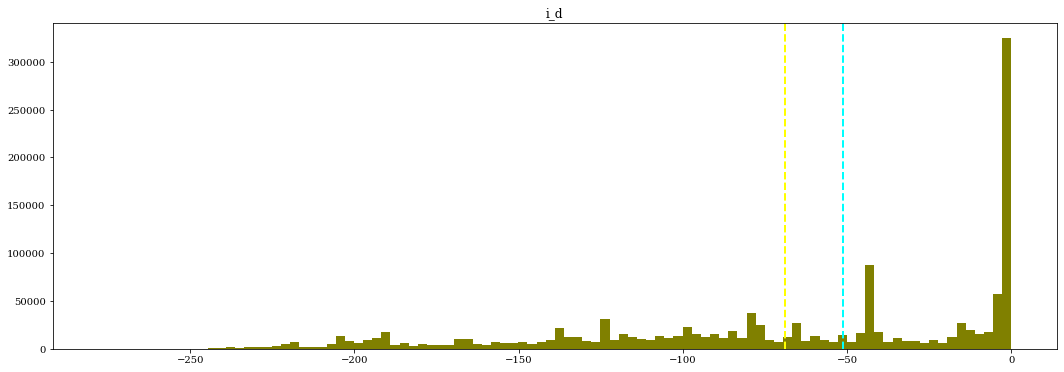

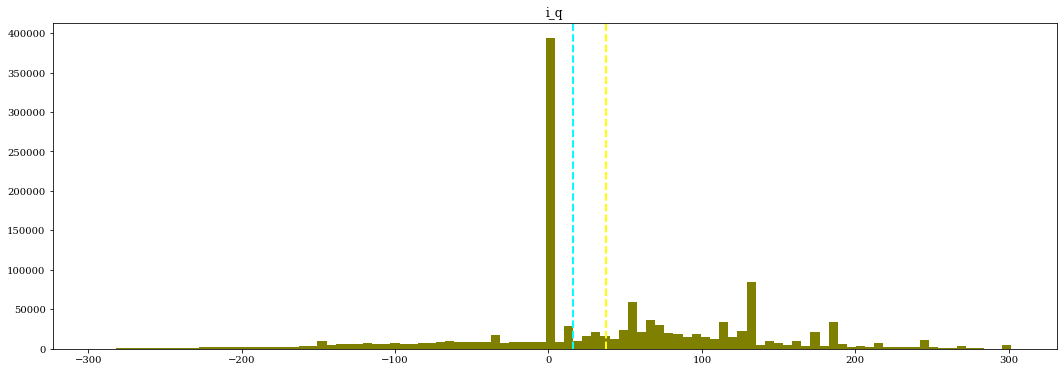

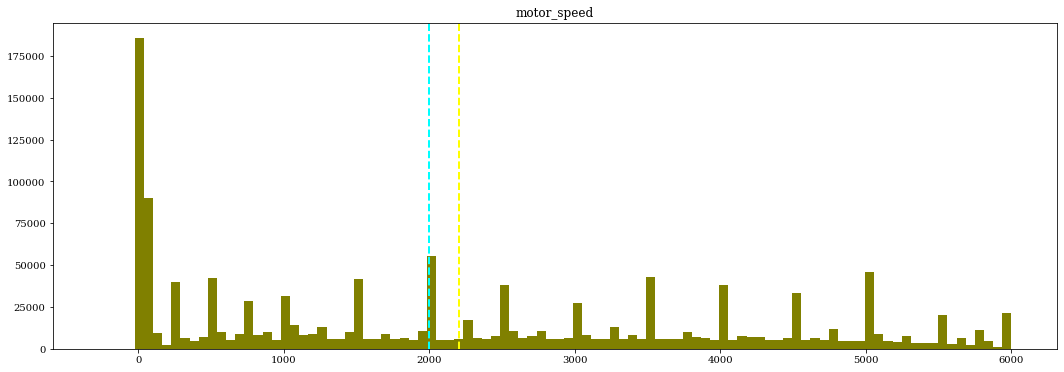

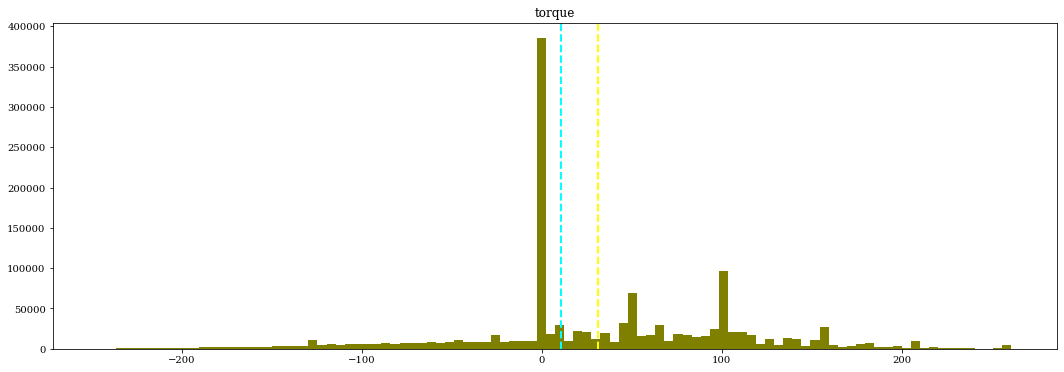

In [27]:
for col in df[['stator_winding', 'stator_tooth', 'stator_yoke', 'ambient', 'coolant','pm','u_d', 'u_q', 'i_d', 'i_q',"motor_speed" , "torque"]]:
    fig = plt.figure(figsize=(18, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax,grid=False,color='olive')
    ax.axvline(feature.mean(), color='yellow', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

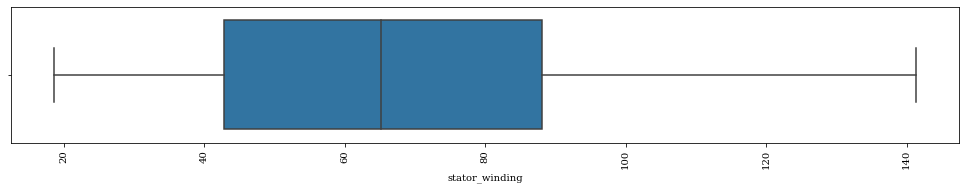

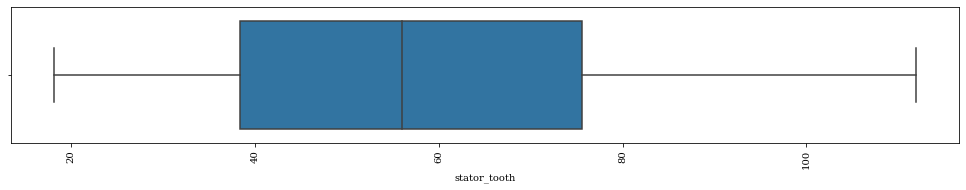

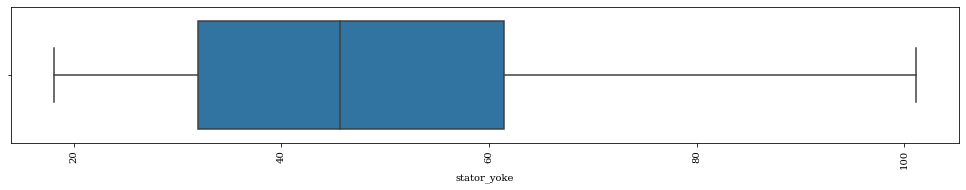

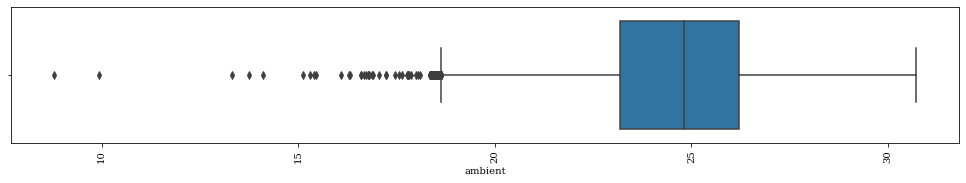

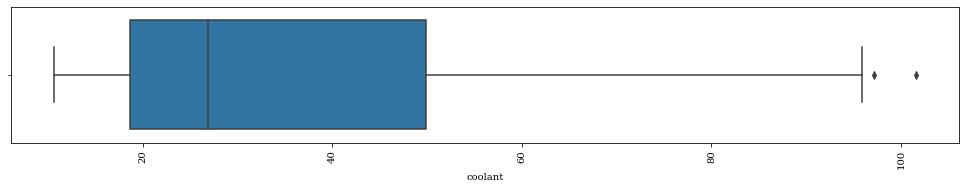

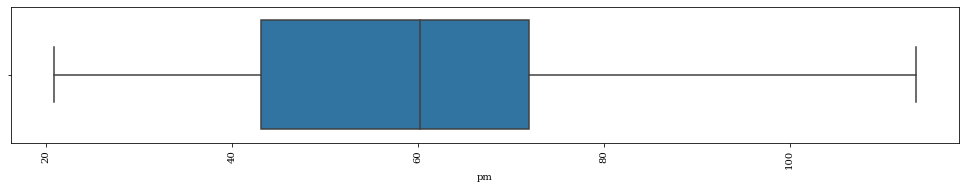

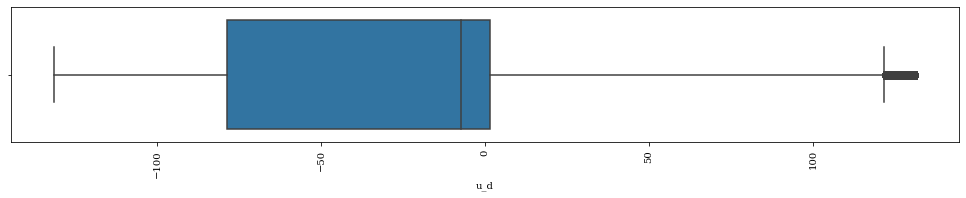

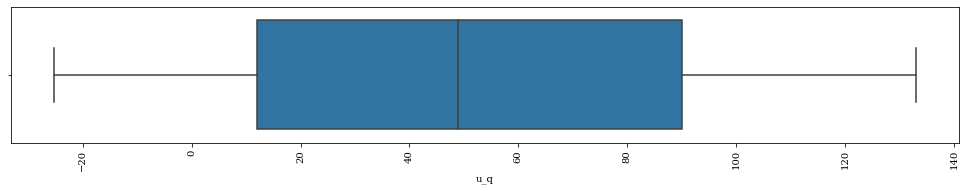

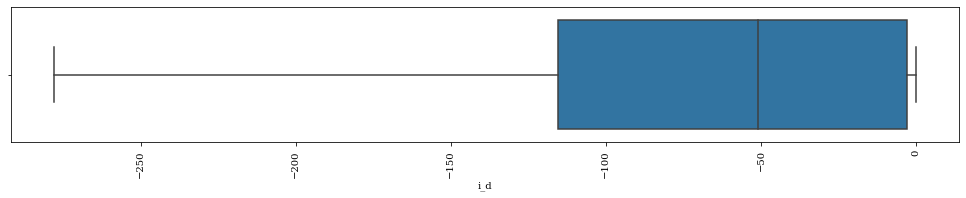

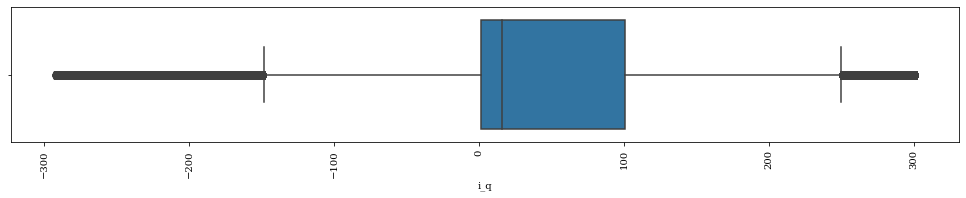

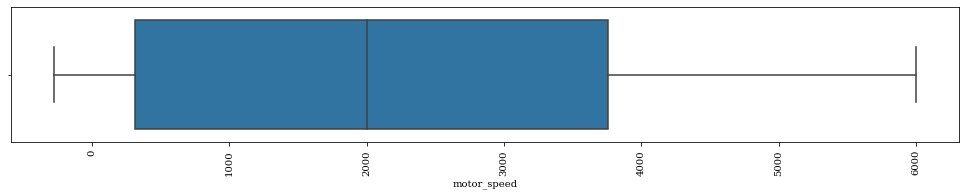

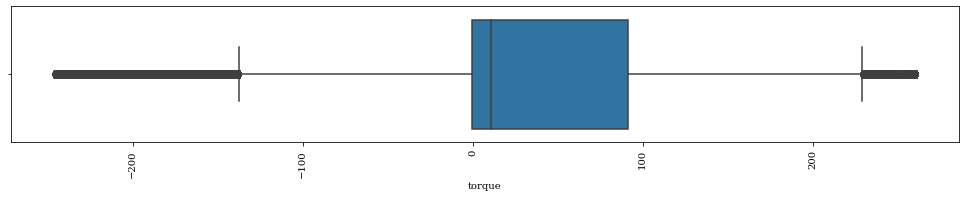

In [28]:
data = df[['stator_winding', 'stator_tooth', 'stator_yoke', 'ambient', 'coolant','pm','u_d', 'u_q', 'i_d', 'i_q',"motor_speed" , "torque"]]
for i in data.columns:
    plt.figure(figsize=(17,2.5))
    sns.boxplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

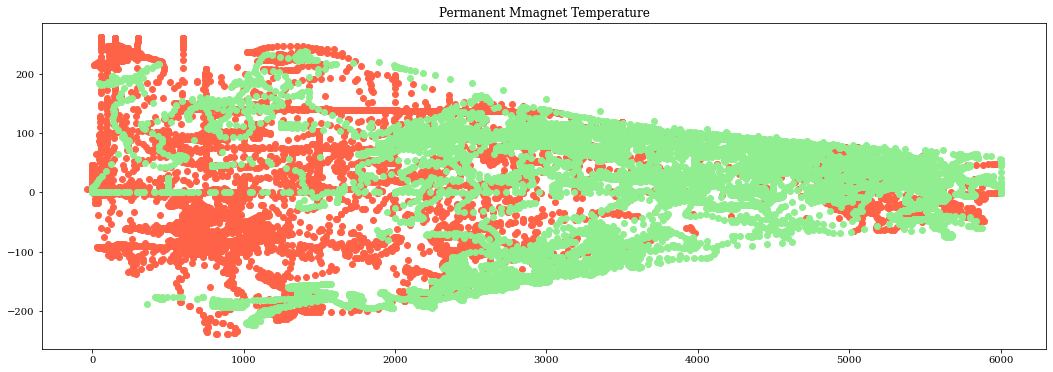

In [29]:
# Creating a figure
plt.figure(figsize=(18,6))


plt.scatter(df.motor_speed[df.pm_range=="Low"], 
            df.torque[df.pm_range=="Low"], 
            c="tomato")


plt.scatter(df.motor_speed[df.pm_range=="V_High"], 
            df.torque[df.pm_range=="V_High"], 
            c="lightgreen")

# Addind info
plt.title("Permanent Mmagnet Temperature");

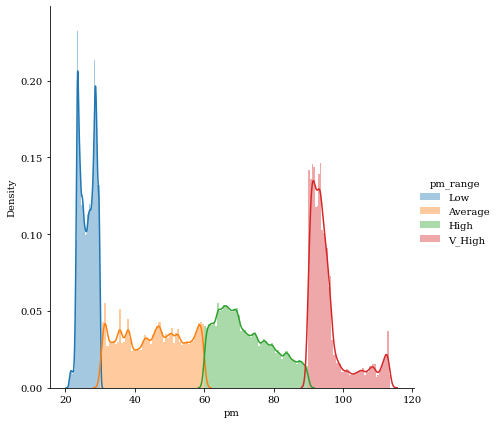

In [30]:
sns.FacetGrid(df, hue='pm_range', height=6).map(sns.distplot, 'pm').add_legend()
plt.show()

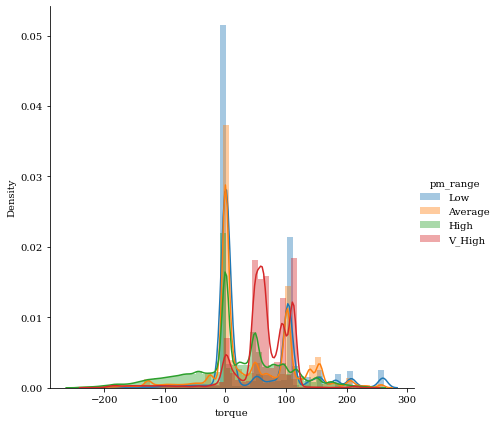

In [31]:
sns.FacetGrid(df, hue='pm_range', height=6).map(sns.distplot, 'torque').add_legend()
plt.show()

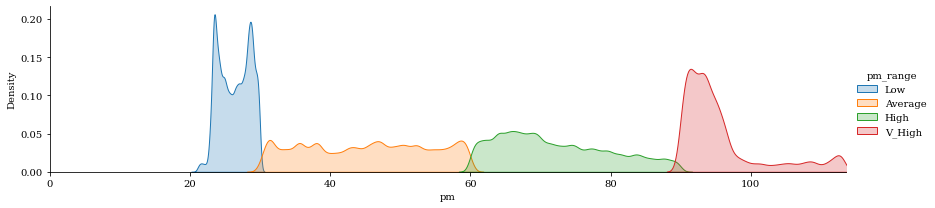

In [32]:
fig = sns.FacetGrid(df, hue="pm_range", aspect=4)
fig.map(sns.kdeplot, 'pm', shade=True)
oldest = df['pm'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

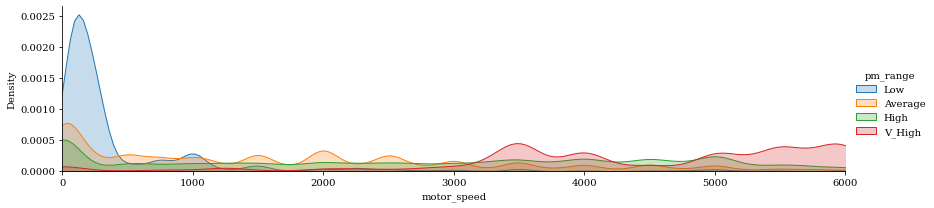

In [33]:
fig = sns.FacetGrid(df, hue="pm_range", aspect=4)
fig.map(sns.kdeplot, 'motor_speed', shade=True)
oldest = df['motor_speed'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

In [34]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['pm_range'])
df = encoder.fit_transform(df)
df.head()

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm,pm_range
0,17,-0.350055,-0.450682,0.004419,0.000328,0.002866,0.187101,19.086670,18.293219,18.316547,19.850691,18.805172,24.554214,1
1,17,-0.305803,-0.325737,0.000606,-0.000785,0.000257,0.245417,19.092390,18.294807,18.314955,19.850672,18.818571,24.538078,1
2,17,-0.372503,-0.440864,0.001290,0.000386,0.002355,0.176615,19.089380,18.294094,18.326307,19.850657,18.828770,24.544693,1
3,17,-0.316199,-0.327026,0.000026,0.002046,0.006105,0.238303,19.083031,18.292542,18.330833,19.850647,18.835567,24.554018,1
4,17,-0.332272,-0.471150,-0.064317,0.037184,0.003133,0.208197,19.082525,18.291428,18.326662,19.850639,18.857033,24.565397,1


In [55]:
X = df.drop('pm',axis=1)
y = df['pm']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [58]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    BaggingRegressor(),
    #RandomForestRegressor(),
    #GradientBoostingRegressor(),
    #ExtraTreesRegressor(),
    #AdaBoostRegressor(),
    #HistGradientBoostingRegressor(),
    #KNeighborsRegressor(),
    #MLPRegressor(),
]

In [61]:
import pickle
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor  # Assuming you want to save BaggingRegressor

def model_selection():
    for model in models:
        model.fit(X_train, y_train)
        predict = model.predict(X_test)

        R2_score = r2_score(predict, y_test).round(3)
        mae = mean_absolute_error(predict, y_test).round(3)
        mse = mean_squared_error(predict, y_test).round(3)
        rmse = np.sqrt(mean_squared_error(predict, y_test))

        print("\033[34m")
        print(model, '\n')
        print("\033[31m")
        print("R2_score                ", "=", R2_score * 100, "%")
        print("Mean Absolute Error     ", "=", mae)
        print("Mean Squared Error      ", "=", mse)
        print("Root Mean Squared Error ", "=", rmse.round(2))

        print("\033[32m")
        print("===" * 15)

        # Save each model with a unique name
        model_name = f'{type(model).__name__}_model.pkl'
        with open(model_name, 'wb') as model_file:
            pickle.dump(model, model_file)

        print(f"{type(model).__name__} model saved as {model_name}")

In [62]:
model_selection()


LinearRegression() 


R2_score                 = 90.60000000000001 %
Mean Absolute Error      = 4.331
Mean Squared Error       = 30.995
Root Mean Squared Error  = 5.57

LinearRegression model saved as LinearRegression_model.pkl

DecisionTreeRegressor() 


R2_score                 = 100.0 %
Mean Absolute Error      = 0.102
Mean Squared Error       = 0.176
Root Mean Squared Error  = 0.42

DecisionTreeRegressor model saved as DecisionTreeRegressor_model.pkl

ExtraTreeRegressor() 


R2_score                 = 100.0 %
Mean Absolute Error      = 0.105
Mean Squared Error       = 0.18
Root Mean Squared Error  = 0.42

ExtraTreeRegressor model saved as ExtraTreeRegressor_model.pkl

BaggingRegressor() 


R2_score                 = 100.0 %
Mean Absolute Error      = 0.099
Mean Squared Error       = 0.091
Root Mean Squared Error  = 0.3

BaggingRegressor model saved as BaggingRegressor_model.pkl
